<a href="https://colab.research.google.com/github/elkinbarretorojas/data_science/blob/main/Exploratory_data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis in Python.

## Let us understand how to explore the data in python.


## Introduction

**What is Exploratory Data Analysis ?**

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

**How to perform Exploratory Data Analysis ?**

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.

**What data are we exploring today ?**



Since I am a huge fan of cars, I got a very beautiful data-set of cars from Kaggle. The data-set can be downloaded from [here](https://www.kaggle.com/CooperUnion/cardataset). To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine HP, Transmission Type, highway MPG, city MPG and many more. So in this tutorial, we will explore the data and make it ready for modeling.



---



## 1. Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) in this tutorial.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)



---



## 2. Loading the data into the data frame.

Loading the data into the pandas data frame is certainly one of the most important steps in EDA, as we can see that the value from the data set is comma-separated. So all we have to do is to just read the CSV into a data frame and pandas data frame does the job for us.

To get or load the dataset into the notebook, all I did was one trivial step. In Google Colab at the left-hand side of the notebook, you will find a > (greater than symbol). When you click that you will find a tab with three options, you just have to select Files. Then you can easily upload your file with the help of the Upload option. No need to mount to the google drive or use any specific libraries just upload the data set and your job is done. One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled. This is how I got the data set into the notebook.

In [5]:
df = pd.read_csv("cartype CSV.csv")
# To display the top 5 rows
df.head(5)

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,1/20/2014,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,681,461,582


In [6]:
df.tail(5)                        # To display the botton 5 rows

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
724,2015,Mercedes-Benz,Mercedes-Benz,GL 550 4MATIC,4.7,8,Auto,13,18,15,Turbocharged,Automatic,7,4-Wheel Drive,Standard SUV 4WD,7/15/2014,660,498,587
725,2015,Mercedes-Benz,Mercedes-Benz,ML 350 4MATIC,3.5,6,Auto,17,22,19,Naturally Aspirated,Automatic,7,4-Wheel Drive,Standard SUV 4WD,7/15/2014,506,396,456
726,2015,Mercedes-Benz,Mercedes-Benz,ML 350 4MATIC,3.5,6,Auto,17,22,19,Naturally Aspirated,Automatic,7,4-Wheel Drive,Standard SUV 4WD,7/23/2014,506,396,456
727,2015,Mercedes-Benz,Mercedes-Benz,ML 400 4MATIC,3.0,6,Auto,18,22,20,Turbocharged,Automatic,7,4-Wheel Drive,Standard SUV 4WD,7/4/2014,496,403,454
728,2015,Volkswagen Group of,Volkswagen,Touareg,3.6,6,Auto,17,23,19,Naturally Aspirated,Semi-Automatic,8,All Wheel Drive,Standard SUV 4WD,8/1/2014,520,391,462




---



## 3. Checking the types of data

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string, if in that case, we have to convert that string to the integer data only then we can plot the data via a graph. Here, in this case, the data is already in integer format so nothing to worry.

In [7]:
df.dtypes

Model Year                    int64
Mfr Name                     object
Division                     object
Carline                      object
Engine Displacement         float64
# Cylinders                   int64
Transmission                 object
City FE                       int64
Highway FE                    int64
Combined FE                   int64
Air Aspiration Method        object
Transmission Description     object
# Gears                       int64
Drive Desc                   object
Carline Class Desc           object
Release Date                 object
City CO2                      int64
Highway CO2                   int64
Combined CO2                  int64
dtype: object



---



## 4. Dropping irrelevant columns

This step is certainly needed in every EDA because sometimes there would be many columns that we never use in such cases dropping is the only solution. In this case, the columns such as Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size doesn't make any sense to me so I just dropped for this instance.

In [9]:
df = df.drop([], axis=1)
df.head(5)

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,1/20/2014,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,681,461,582




---



## 5. Renaming the columns

In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set.

In [10]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,1/20/2014,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,681,461,582




---



## 6. Dropping the duplicate rows

This is often a handy thing to do because a huge data set as in this case contains more than 10, 000 rows often have some duplicate data which might be disturbing, so here I remove all the duplicate value from the data-set. For example prior to removing I had 11914 rows of data but after removing the duplicates 10925 data meaning that I had 989 of duplicate data.

In [11]:
df.shape

(729, 19)

In [12]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (7, 19)


Now let us remove the duplicate data because it's ok to remove them.

In [13]:
df.count()      # Used to count the number of rows

Model Year                  729
Mfr Name                    729
Division                    729
Carline                     729
Engine Displacement         729
# Cylinders                 729
Transmission                729
City FE                     729
Highway FE                  729
Combined FE                 729
Air Aspiration Method       729
Transmission Description    729
# Gears                     729
Drive Desc                  729
Carline Class Desc          729
Release Date                729
City CO2                    729
Highway CO2                 729
Combined CO2                729
dtype: int64

So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [14]:
df = df.drop_duplicates()
df.head(5)

,Model Year,Mfr Name,Division,Carline,Engine Displacement,# Cylinders,Transmission,City FE,Highway FE,Combined FE,Air Aspiration Method,Transmission Description,# Gears,Drive Desc,Carline Class Desc,Release Date,City CO2,Highway CO2,Combined CO2
0,2015,aston martin,Aston Martin Lagonda Ltd,V12 Vantage S,6.0,12,Auto,12,18,14,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,1/20/2014,742,488,628
1,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,655,426,552
2,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,681,461,582
3,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Auto,14,21,16,Naturally Aspirated,Automated Manual,7,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,655,426,552
4,2015,aston martin,Aston Martin Lagonda Ltd,V8 Vantage S,4.7,8,Manual,13,19,15,Naturally Aspirated,Manual,6,"2-Wheel Drive, Rear",Two Seaters,5/19/2014,681,461,582


In [15]:
df.count()

Model Year                  722
Mfr Name                    722
Division                    722
Carline                     722
Engine Displacement         722
# Cylinders                 722
Transmission                722
City FE                     722
Highway FE                  722
Combined FE                 722
Air Aspiration Method       722
Transmission Description    722
# Gears                     722
Drive Desc                  722
Carline Class Desc          722
Release Date                722
City CO2                    722
Highway CO2                 722
Combined CO2                722
dtype: int64



---



## 7. Dropping the missing or null values.

This is mostly similar to the previous step but in here all the missing values are detected and are dropped later. Now, this is not a good approach to do so, because many people just replace the missing values with the mean or the average of that column, but in this case, I just dropped that missing values. This is because there is nearly 100 missing value compared to 10, 000 values this is a small number and this is negligible so I just dropped those values.

In [16]:
print(df.isnull().sum())

Model Year                  0
Mfr Name                    0
Division                    0
Carline                     0
Engine Displacement         0
# Cylinders                 0
Transmission                0
City FE                     0
Highway FE                  0
Combined FE                 0
Air Aspiration Method       0
Transmission Description    0
# Gears                     0
Drive Desc                  0
Carline Class Desc          0
Release Date                0
City CO2                    0
Highway CO2                 0
Combined CO2                0
dtype: int64


This is the reason in the above step while counting both Cylinders and Horsepower (HP) had 10856 and 10895 over 10925 rows.

In [17]:
df = df.dropna()    # Dropping the missing values.
df.count()

Model Year                  722
Mfr Name                    722
Division                    722
Carline                     722
Engine Displacement         722
# Cylinders                 722
Transmission                722
City FE                     722
Highway FE                  722
Combined FE                 722
Air Aspiration Method       722
Transmission Description    722
# Gears                     722
Drive Desc                  722
Carline Class Desc          722
Release Date                722
City CO2                    722
Highway CO2                 722
Combined CO2                722
dtype: int64

Now we have removed all the rows which contain the Null or N/A values (Cylinders and Horsepower (HP)).

In [18]:
print(df.isnull().sum())   # After dropping the values

Model Year                  0
Mfr Name                    0
Division                    0
Carline                     0
Engine Displacement         0
# Cylinders                 0
Transmission                0
City FE                     0
Highway FE                  0
Combined FE                 0
Air Aspiration Method       0
Transmission Description    0
# Gears                     0
Drive Desc                  0
Carline Class Desc          0
Release Date                0
City CO2                    0
Highway CO2                 0
Combined CO2                0
dtype: int64




---



## 8. Detecting Outlierss

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It's often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it's a good idea to remove them. The outlier detection and removing that I am going to perform is called IQR score technique. Often outliers can be seen with visualizations using a box plot. Shown below are the box plot of MSRP, Cylinders, Horsepower and EngineSize. Herein all the plots, you can find some points are outside the box they are none other than outliers. The technique of finding and removing outlier that I am performing in this assignment is taken help of a tutorial from[ towards data science](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba).

In [19]:
#sns.boxplot(x=df['Price'])

In [20]:
#sns.boxplot(x=df['HP'])

<Axes: xlabel='# Cylinders'>

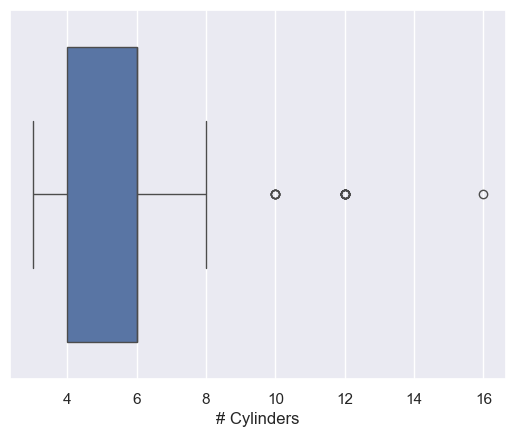

In [22]:
sns.boxplot(x=df['# Cylinders'])

In [24]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

Don't worry about the above values because it's not important to know each and every one of them because it's just important to know how to use this technique in order to remove the outliers.

In [26]:
#df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df.shape

As seen above there were around 1600 rows were outliers. But you cannot completely remove the outliers because even after you use the above technique there maybe 1–2 outlier unremoved but that ok because there were more than 100 outliers. Something is better than nothing.



---



## 9. Plot different features against one another (scatter), against frequency (histogram)

### Histogram

Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

In [28]:
#df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
#plt.title("Number of cars by make")
#plt.ylabel('Number of cars')
#plt.xlabel('Make');

### Heat Maps

Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.

In [30]:
#plt.figure(figsize=(10,5))
#c= df.corr()
#sns.heatmap(c,cmap="BrBG",annot=True)
#c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

In [32]:
#fig, ax = plt.subplots(figsize=(10,6))
#ax.scatter(df['HP'], df['Price'])
#ax.set_xlabel('HP')
#ax.set_ylabel('Price')
#plt.show()

**Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA. There are many more yet to come but for now, this is more than enough idea as to how to perform a good EDA given any data sets. Stay tuned for more updates.**

## Thank you.